# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
import xgboost as xgb

In [30]:
df = pd.read_csv("healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [31]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [33]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [34]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df['Test Results'] = le.fit_transform(df['Test Results'])

dropcolumns = ['Name','Date of Admission', 'Discharge Date', 'Doctor', 'Hospital', 'Insurance Provider','Billing Amount', 'Room Number', 'Admission Type']
df.drop(columns=dropcolumns, inplace=True)

In [35]:
df

,Age,Gender,Blood Type,Medical Condition,Medication,Test Results
0,81,0,O-,Diabetes,Aspirin,1
1,35,1,O+,Asthma,Lipitor,2
2,61,1,B-,Obesity,Lipitor,2
3,49,1,B-,Asthma,Penicillin,0
4,51,1,O-,Arthritis,Paracetamol,2
...,...,...,...,...,...,...
9995,83,1,A+,Obesity,Ibuprofen,0
9996,47,0,AB+,Arthritis,Ibuprofen,2
9997,54,1,B-,Arthritis,Ibuprofen,2
9998,84,1,A+,Arthritis,Penicillin,2


In [36]:
print(df.describe())

                Age        Gender  Test Results
count  10000.000000  10000.000000  10000.000000
mean      51.452200      0.492500      0.981100
std       19.588974      0.499969      0.819762
min       18.000000      0.000000      0.000000
25%       35.000000      0.000000      0.000000
50%       52.000000      0.000000      1.000000
75%       68.000000      1.000000      2.000000
max       85.000000      1.000000      2.000000


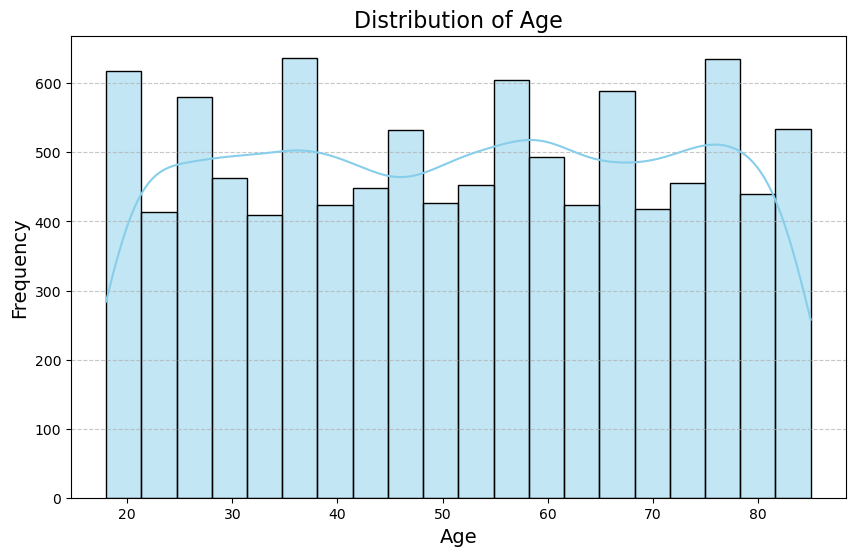

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

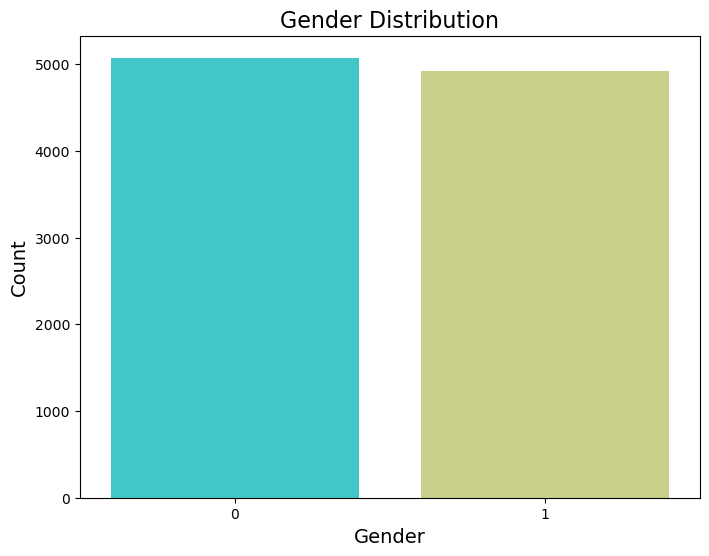

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='rainbow')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

/var/folders/2g/62ncn4gn7k508zynq4hr8qkh0000gp/T/ipykernel_3060/1130557262.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


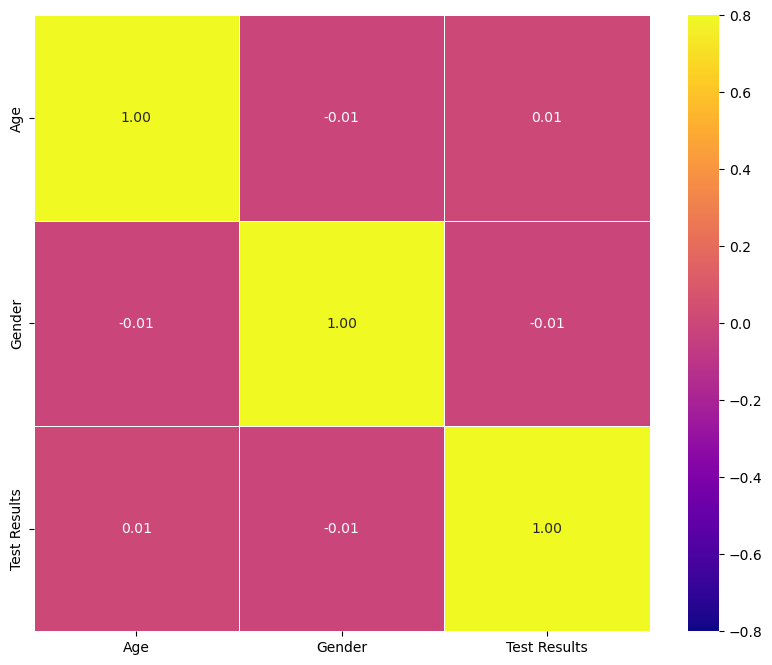

In [42]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='plasma', linewidths=.5, vmin=-0.8, vmax=0.8, square=True)
plt.show()

In [43]:
# predict Medication
X_reg = df.drop(['Medication'], axis=1)
y_reg = df['Medication']

label_encoder = LabelEncoder()
y_reg_encoded = label_encoder.fit_transform(y_reg)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg_encoded, test_size=0.2, random_state=42)

categorical_cols = ['Blood Type', 'Medical Condition']
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_reg_train_encoded = pd.get_dummies(X_reg_train, columns=categorical_cols)
X_reg_test_encoded = pd.get_dummies(X_reg_test, columns=categorical_cols)

reg_model = LinearRegression()
reg_model.fit(X_reg_train_encoded, y_reg_train)

reg_preds = reg_model.predict(X_reg_test_encoded)

from sklearn.metrics import r2_score

reg_r2 = r2_score(y_reg_test, reg_preds)
print(f'Regression R-squared: {reg_r2}')

X_class = pd.get_dummies(df.drop(['Test Results'], axis=1)) 
y_class = df['Test Results']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

class_model = RandomForestClassifier()
class_model.fit(X_class_train, y_class_train)
class_preds = class_model.predict(X_class_test)
class_accuracy = accuracy_score(y_class_test, class_preds)
class_precision = precision_score(y_class_test, class_preds, average='weighted')
class_recall = recall_score(y_class_test, class_preds, average='weighted')

print(f'Classification Accuracy: {class_accuracy}')
print(f'Classification Precision: {class_precision}')
print(f'Classification Recall: {class_recall}')

/Users/mac/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mac/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mac/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  

Regression R-squared: -0.0007184728769333848
Classification Accuracy: 0.3275
Classification Precision: 0.3281708558159809
Classification Recall: 0.3275


/Users/mac/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


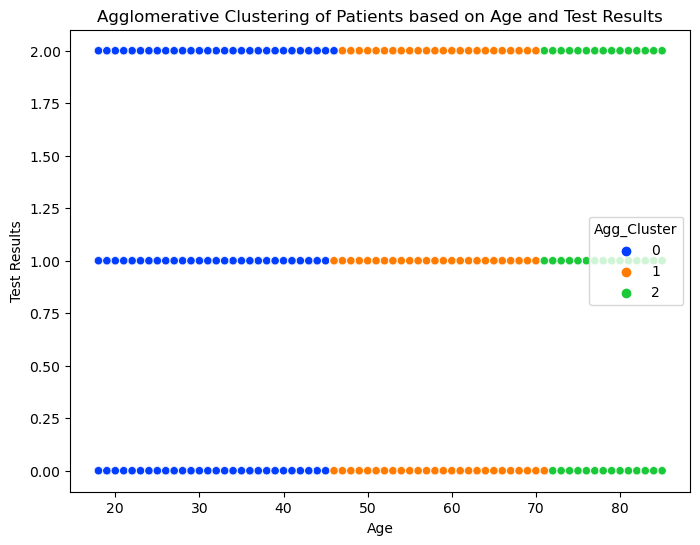

In [44]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Age' and encoded 'Test Results' are the columns used for clustering
X_cluster = df[['Age', 'Test Results']]

# Initializing Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X_cluster)

# Adding cluster labels to the dataset
df['Agg_Cluster'] = agg_labels

# Visualizing the clusters using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Test Results', hue='Agg_Cluster', data=df, palette='bright')
plt.title('Agglomerative Clustering of Patients based on Age and Test Results')
plt.show()


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Assume 'Test Results' is the target variable, and you have features in X_class
X_class = pd.get_dummies(df.drop(['Test Results'], axis=1)) 
y_class = df['Test Results']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# XGBoost Classification
xgb_class_model = xgb.XGBClassifier()
xgb_class_model.fit(X_class_train, y_class_train)
xgb_class_preds = xgb_class_model.predict(X_class_test)
xgb_class_accuracy = accuracy_score(y_class_test, xgb_class_preds)
print(f'XGBoost Classification Accuracy: {xgb_class_accuracy}')

XGBoost Classification Accuracy: 0.35


/Users/mac/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/Users/mac/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X_class = df[['Age', 'Test Results']]
y_class = df['Gender']

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Creating a KNN classifier object
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

knn_model.fit(X_class_train, y_class_train)
knn_preds = knn_model.predict(X_class_test)

# Calculating the accuracy of the KNN model
knn_accuracy = accuracy_score(y_class_test, knn_preds)
print(f'KNN Classification Accuracy: {knn_accuracy}')


KNN Classification Accuracy: 0.4925


In [47]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Select relevant columns
df_apriori = df[['Age', 'Blood Type', 'Medical Condition', 'Medication', 'Test Results']]

# Convert 'Medication' to string and strip whitespace
df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()

# Convert to one-hot encoding
df_apriori_encoded = pd.get_dummies(df_apriori['Medication'])

# Run Apriori algorithm
frequent_itemsets = apriori(df_apriori_encoded, min_support=0.2, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules with confidence >= 0.6
rules_confidence_06 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("\nAssociation Rules with Confidence >= 0.6:")
print(rules_confidence_06)

Frequent Itemsets:
   support      itemsets
0   0.2015     (Lipitor)
1   0.2079  (Penicillin)

Association Rules with Confidence >= 0.6:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/var/folders/2g/62ncn4gn7k508zynq4hr8qkh0000gp/T/ipykernel_3060/3914740302.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()
/Users/mac/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
